<a href="https://colab.research.google.com/github/Patty-09/ML-Project-for-detecting-Fraudulant-Transaction/blob/main/Fraud_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step1 Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read our data from dataset.
ori_data=pd.read_csv("/content/drive/MyDrive/ML_Training/fraud__transaction_dataset.csv")

In [ ]:
ori_data

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,93213.17,Laptop,Sydney,Travel,0,7,437.63,3,Amex,65,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,13,478.76,4,Mastercard,186,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,14,50.01,4,Visa,226,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,8,182.48,4,Visa,76,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,92354.66,Mobile,Mumbai,Electronics,1,14,328.69,4,Mastercard,140,Password,0.3819,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,TXN_11284,USER_4796,45.05,Online,76960.11,Mobile,Tokyo,Clothing,0,2,389.00,3,Amex,98,PIN,0.1493,1,0
49996,TXN_44732,USER_1171,126.15,POS,28791.75,Mobile,Tokyo,Clothing,0,13,434.95,4,Visa,93,Biometric,0.3653,0,1
49997,TXN_38158,USER_2510,72.02,Online,29916.41,Laptop,Mumbai,Clothing,1,1,369.15,2,Visa,114,Biometric,0.5195,0,0
49998,TXN_860,USER_2248,64.89,Bank Transfer,67895.67,Mobile,Tokyo,Electronics,0,13,242.29,4,Discover,72,Biometric,0.7063,0,1


In [ ]:
ori_data.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Account_Balance', 'Device_Type', 'Location', 'Merchant_Category',
       'Previous_Fraudulent_Activity', 'Daily_Transaction_Count',
       'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Card_Type',
       'Card_Age', 'Authentication_Method', 'Risk_Score', 'Is_Weekend',
       'Fraud_Label'],
      dtype='object')

In [ ]:
data_backup = ori_data.copy()

 Transaction_ID: Just a unique number for each transaction, doesn’t help in predicting fraud.

User_ID: Only identifies the user; using it might lead to wrong patterns or overfitting

 Is_Weekend: This is usually taken from the timestamp, but since I'm not using the timestamp in my data, this column doesn't add much value and is removed


In [ ]:
#Dropping Unnecessary Columns
ori_data.drop(['Transaction_ID','User_ID','Is_Weekend','Previous_Fraudulent_Activity'],axis=1,inplace=True)

In [ ]:
ori_data.columns

Index(['Transaction_Amount', 'Transaction_Type', 'Account_Balance',
       'Device_Type', 'Location', 'Merchant_Category',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Authentication_Method', 'Risk_Score', 'Fraud_Label'],
      dtype='object')

**Performing EDA**

In [ ]:
#GETTING TOP VALUES
ori_data.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Authentication_Method,Risk_Score,Fraud_Label
0,39.79,POS,93213.17,Laptop,Sydney,Travel,7,437.63,3,Amex,65,Biometric,0.8494,0
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,13,478.76,4,Mastercard,186,Password,0.0959,1
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,14,50.01,4,Visa,226,Biometric,0.8400,1
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,8,182.48,4,Visa,76,OTP,0.7935,1
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,14,328.69,4,Mastercard,140,Password,0.3819,1


In [ ]:
#GETTING BOTTOM VALUES
ori_data.tail()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Authentication_Method,Risk_Score,Fraud_Label
49995,45.05,Online,76960.11,Mobile,Tokyo,Clothing,2,389.00,3,Amex,98,PIN,0.1493,0
49996,126.15,POS,28791.75,Mobile,Tokyo,Clothing,13,434.95,4,Visa,93,Biometric,0.3653,1
49997,72.02,Online,29916.41,Laptop,Mumbai,Clothing,1,369.15,2,Visa,114,Biometric,0.5195,0
49998,64.89,Bank Transfer,67895.67,Mobile,Tokyo,Electronics,13,242.29,4,Discover,72,Biometric,0.7063,1
49999,13.00,Bank Transfer,7668.82,Tablet,London,Restaurants,5,273.78,1,Mastercard,154,OTP,0.8938,1


In [ ]:
#Getting Statistical Info
ori_data.describe()

,Transaction_Amount,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Risk_Score,Fraud_Label
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,7.485240,255.271924,2.003540,119.999940,0.501556,0.321340
std,98.687292,28760.458557,4.039637,141.382279,1.414273,68.985817,0.287774,0.466996
min,0.000000,500.480000,1.000000,10.000000,0.000000,1.000000,0.000100,0.000000
25%,28.677500,25355.995000,4.000000,132.087500,1.000000,60.000000,0.254000,0.000000
50%,69.660000,50384.430000,7.000000,256.085000,2.000000,120.000000,0.502250,0.000000
75%,138.852500,75115.135000,11.000000,378.032500,3.000000,180.000000,0.749525,1.000000
max,1174.140000,99998.310000,14.000000,500.000000,4.000000,239.000000,1.000000,1.000000


In [ ]:
#Getting info about attribute
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_Amount           50000 non-null  float64
 1   Transaction_Type             50000 non-null  object 
 2   Account_Balance              50000 non-null  float64
 3   Device_Type                  50000 non-null  object 
 4   Location                     50000 non-null  object 
 5   Merchant_Category            50000 non-null  object 
 6   Daily_Transaction_Count      50000 non-null  int64  
 7   Avg_Transaction_Amount_7d    50000 non-null  float64
 8   Failed_Transaction_Count_7d  50000 non-null  int64  
 9   Card_Type                    50000 non-null  object 
 10  Card_Age                     50000 non-null  int64  
 11  Authentication_Method        50000 non-null  object 
 12  Risk_Score                   50000 non-null  float64
 13  Fraud_Label     

In [ ]:
ori_data.shape

(50000, 14)

**Categorical features** :Transaction_Type,Device_Type,Location,Merchant_Category,Card_Type,Authentication_Method

 **Numerical features**:Transaction_Amount, Account_Balance,	Daily_Transaction_Count	,Avg_Transaction_Amount_7d	Failed_Transaction_Count_7d,Risk_Score,Fraud_Label,Card_Age

### **Advance EDA**

In [ ]:
ori_data.isnull()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Authentication_Method,Risk_Score,Fraud_Label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
ori_data.isnull().sum()

,0
Transaction_Amount,0
Transaction_Type,0
Account_Balance,0
Device_Type,0
Location,0
Merchant_Category,0
Daily_Transaction_Count,0
Avg_Transaction_Amount_7d,0
Failed_Transaction_Count_7d,0
Card_Type,0


In [ ]:
ori_data.columns

Index(['Transaction_Amount', 'Transaction_Type', 'Account_Balance',
       'Device_Type', 'Location', 'Merchant_Category',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Authentication_Method', 'Risk_Score', 'Fraud_Label'],
      dtype='object')

**Check for duplicate**

In [ ]:
ori_data[ori_data.duplicated()]

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Authentication_Method,Risk_Score,Fraud_Label


There is no duplicate  we observed
But if their is any duplicate we observed then follow below steps to delete it and giving back indexing

data.drop_duplicates(inplace=True)

data.reset_index(drop=True, inplace=True)

data.shape

here there are many outlier in attribute transaction_amount

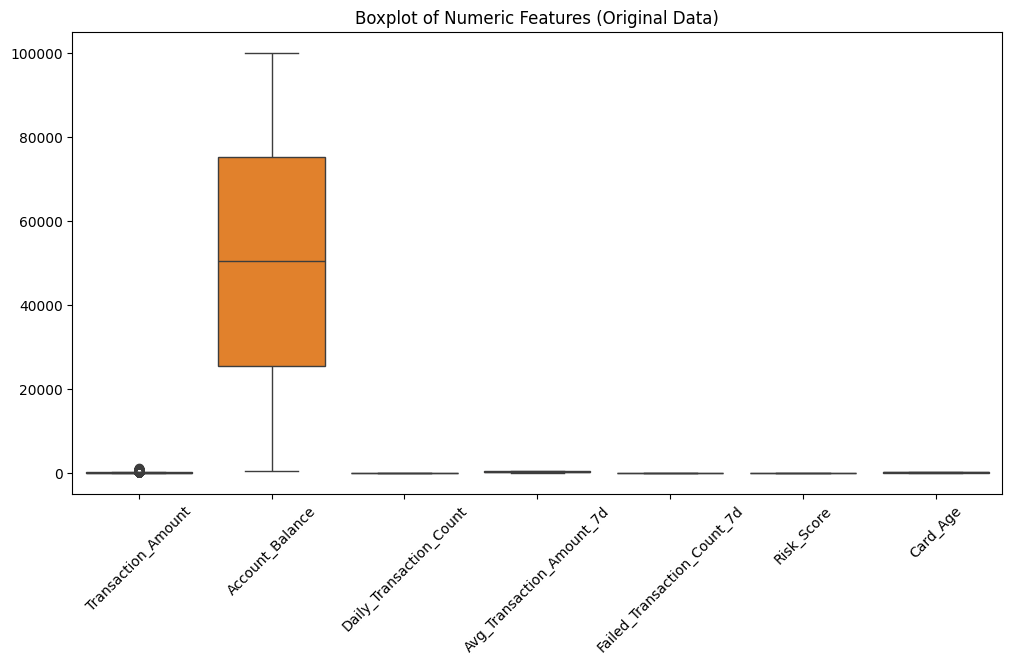

In [ ]:
# Checking outlier in numeric column

# List of numeric columns to visualize
num_cols = ['Transaction_Amount', 'Account_Balance',
            'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
            'Failed_Transaction_Count_7d', 'Risk_Score', 'Card_Age']

# Plotting boxplot using original data
plt.figure(figsize=(12, 6))
sns.boxplot(data=ori_data[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features (Original Data)")
plt.show()


OBSERVATION

Transaction_Amount  show clear outliers.

Account_Balance has a wide range but no significant outliers.

Other features appear compressed due to scale difference and show minimal or no outliers.



**Using IQR Method for checking more clearly**


In [ ]:
#Finding values of outliers(IQR method)
# 1. Sort the dataset in ascending order,
# 2 calculate the 1st and 3rd quartiles(Q1, Q3)
# 3  compute IQR=Q3-Q1,
# 4 compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR),
# 5 loop through the values of the dataset and check for those who fall below the lower bound
#and above the upper bound and mark them as outliers


In [ ]:
def detect_outliers_iqr(data):
    outlier_list = []
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['Transaction_Amount', 'Account_Balance',
            'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
            'Failed_Transaction_Count_7d', 'Risk_Score', 'Card_Age']:
    outliers = detect_outliers_iqr(ori_data[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in Transaction_Amount attribute : [367.5, 308.73, 306.6, 394.62, 363.86, 425.97, 513.78, 309.46, 305.14, 376.37, 469.43, 335.32, 347.42, 384.23, 309.57, 311.23, 489.35, 327.61, 417.51, 427.47, 375.61, 316.8, 456.02, 304.23, 375.72, 419.99, 383.8, 382.82, 334.04, 576.44, 337.16, 493.12, 307.24, 402.19, 312.51, 331.81, 484.83, 593.03, 343.87, 558.0, 328.51, 496.19, 313.17, 647.91, 396.85, 335.53, 352.22, 492.3, 379.25, 315.28, 422.83, 363.85, 324.85, 376.98, 307.8, 474.39, 390.13, 333.05, 323.94, 361.36, 406.88, 313.12, 377.41, 308.78, 308.12, 361.5, 395.73, 372.56, 318.13, 545.32, 305.01, 335.88, 328.23, 328.11, 356.5, 307.04, 398.75, 372.5, 327.94, 800.97, 328.92, 689.61, 357.96, 373.07, 381.43, 313.92, 409.27, 440.34, 311.61, 312.27, 802.34, 311.56, 379.5, 307.94, 364.34, 388.25, 418.35, 349.57, 402.72, 348.69, 493.13, 717.5, 476.39, 378.06, 430.67, 454.53, 404.38, 344.01, 642.35, 516.91, 419.59, 371.69, 509.76, 344.9, 349.24, 326.51, 334.0, 460.01, 385.86, 329.89, 364.9, 379

Observation:
As their are outlier in the columns
'Transaction_Amount':[304.15, 304.16, 304.18, 304.23, 304.29, 304.48,......]

In [ ]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or
# floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    print('10th,tenth_percentile',tenth_percentile)
    print('90th,tenth_percentile',ninetieth_percentile)

# This NumPy function replaces all values in the data array that are less than tenth_percentile
# with the value of tenth_percentile, and keeps all other values unchanged.

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['Transaction_Amount', 'Account_Balance',
            'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
            'Failed_Transaction_Count_7d', 'Risk_Score', 'Card_Age']:
    ori_data[i]=handle_outliers(ori_data[i])
    print(ori_data[i])



10th,tenth_percentile 10.47
90th,tenth_percentile 227.03099999999998
0         39.790
1         10.470
2         28.960
3        227.031
4         31.280
          ...   
49995     45.050
49996    126.150
49997     72.020
49998     64.890
49999     13.000
Name: Transaction_Amount, Length: 50000, dtype: float64
10th,tenth_percentile 10267.041000000003
90th,tenth_percentile 90125.15100000001
0        90125.151
1        75725.250
2        10267.041
3        76807.200
4        90125.151
           ...    
49995    76960.110
49996    28791.750
49997    29916.410
49998    67895.670
49999    10267.041
Name: Account_Balance, Length: 50000, dtype: float64
10th,tenth_percentile 2.0
90th,tenth_percentile 13.0
0         7.0
1        13.0
2        13.0
3         8.0
4        13.0
         ... 
49995     2.0
49996    13.0
49997     2.0
49998    13.0
49999     5.0
Name: Daily_Transaction_Count, Length: 50000, dtype: float64
10th,tenth_percentile 59.169000000000004
90th,tenth_percentile 450.96
0      

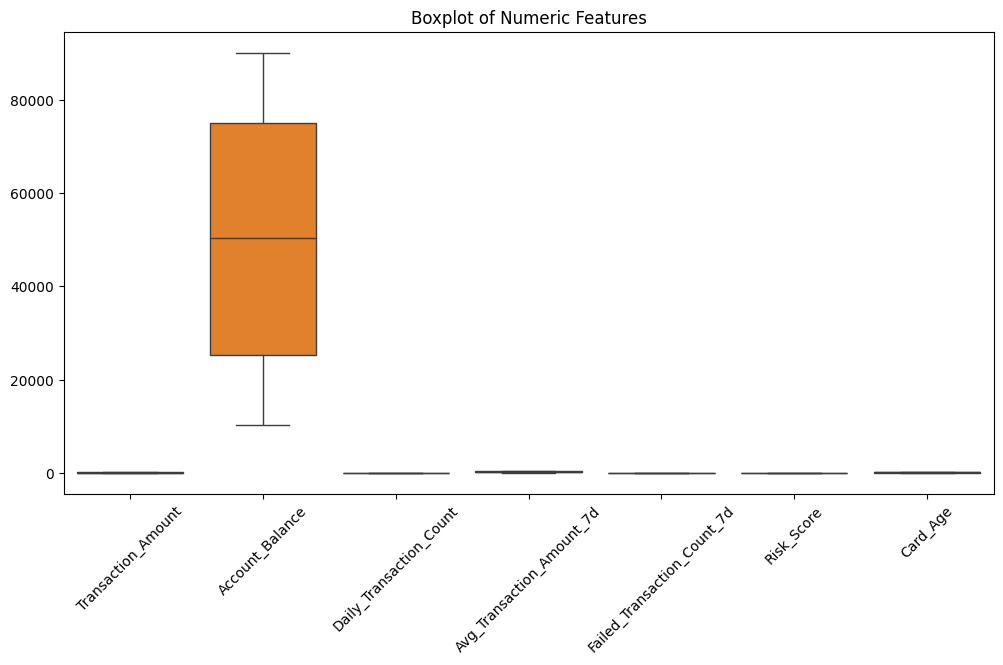

In [ ]:
# verifying again with boxplot

# List of numeric columns to visualize
num_cols = ['Transaction_Amount', 'Account_Balance',
            'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
            'Failed_Transaction_Count_7d', 'Risk_Score', 'Card_Age']

# Plotting boxplot using original data
plt.figure(figsize=(12, 6))
sns.boxplot(data=ori_data[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features")
plt.show()


**Visualization**

Histogram for numeric variable only

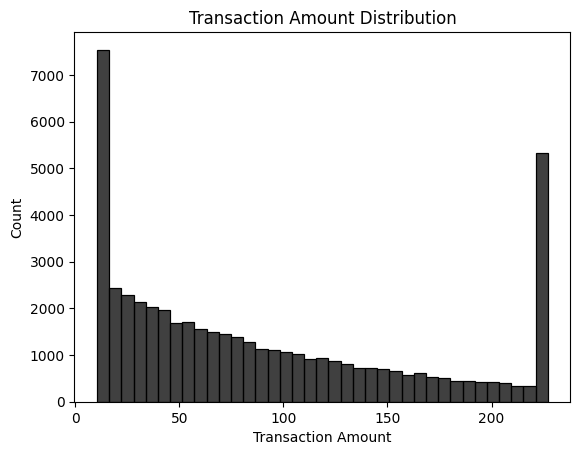

In [ ]:
# A histogram is a graph showing frequency distributions.
# It is a graph showing the number of observations within each given interval.
# The hist() function will read the array and produce a histogram:

sns.histplot(ori_data.Transaction_Amount,color='black')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.savefig('transaction_amount.png')
plt.show()


Observation

Here in plot we can observe that most of transaction are low in amount
and low transaction amt range is between 20,200 somewhere

only few transaction of high amount occured

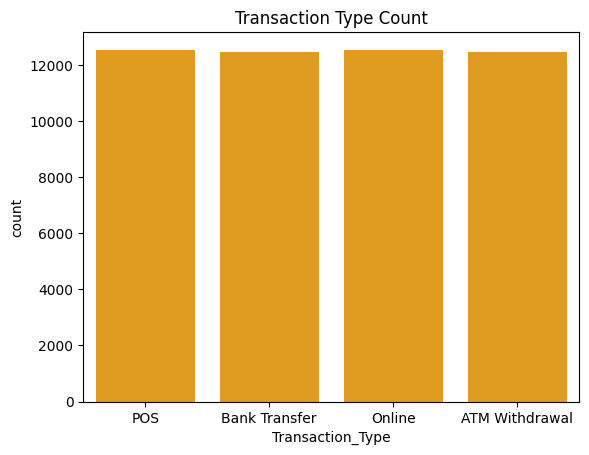

In [ ]:
#Univariate plot to count transaction type
sns.countplot(x='Transaction_Type', data=ori_data,color='Orange')
plt.title('Transaction Type Count')
plt.show()

In [ ]:
#Transaction Type
ori_data.Transaction_Type.value_counts().to_frame()

,count
Transaction_Type,
POS,12549
Online,12546
ATM Withdrawal,12453
Bank Transfer,12452


Observation:

POS and Online transactions are the most frequent in count, followed closely by Bank Transfers.

 ATM Withdrawals are the least common among all transaction types.


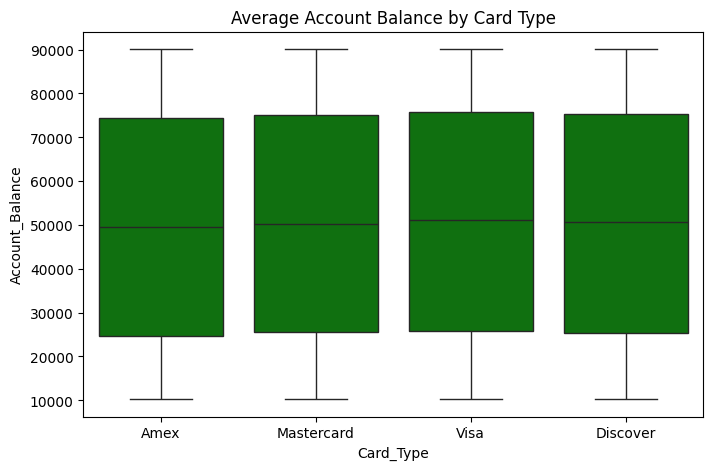

In [ ]:
#Bivariate (distribution on two fetures)
#Distribution of account balance by card type
plt.figure(figsize=(8,5))
sns.boxplot(x='Card_Type', y='Account_Balance', data=ori_data,color='green')
plt.title('Average Account Balance by Card Type')
plt.show()


Observation:

Whether a customer holds an Amex, Mastercard, Visa, or Discover, their typical account balance distribution remains fairly consistent.

In short all card types have similar account balance distributions with no major differences.


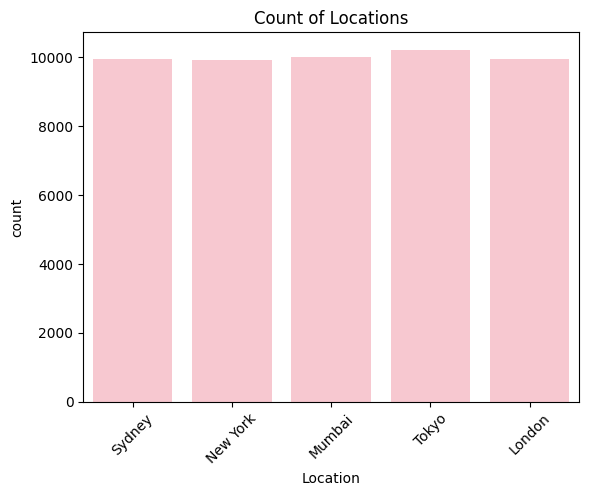

In [ ]:
#.Location
sns.countplot(x='Location', data=ori_data,color='pink')
plt.title('Count of Locations')
plt.xticks(rotation=45)
plt.show()

In [ ]:
ori_data.Location.value_counts().to_frame()

,count
Location,
Tokyo,10208
Mumbai,9994
London,9945
Sydney,9938
New York,9915


Observation:

Almost every city count involved in transaction is equaly distributed

The dataset has a nearly equal distribution of records across all five global cities, ensuring location-based analyses won’t be skewed due to data imbalance.

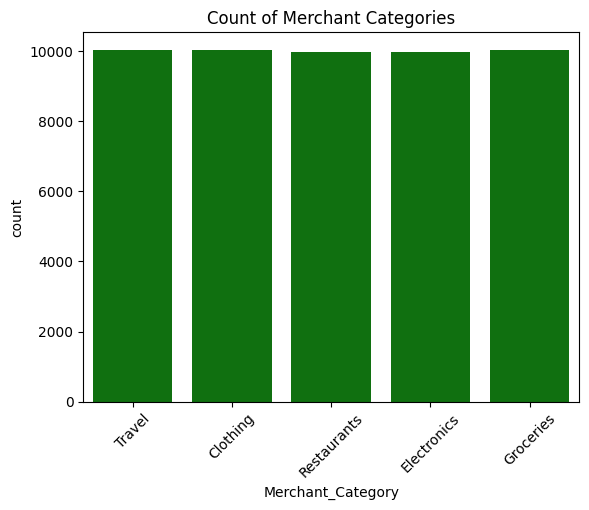

In [ ]:
#Merchant Type
sns.countplot(x='Merchant_Category', data=ori_data,color='green')
plt.title('Count of Merchant Categories')
plt.xticks(rotation=45)
plt.show()


In [ ]:
ori_data.Merchant_Category.value_counts().to_frame()

,count
Merchant_Category,
Clothing,10033
Groceries,10019
Travel,10015
Restaurants,9976
Electronics,9957


Observation:

The person from the category Clothing ,Groceries and Travelhas almost same count in transation.

while the person from category Restraunt and Electronics has less involvment

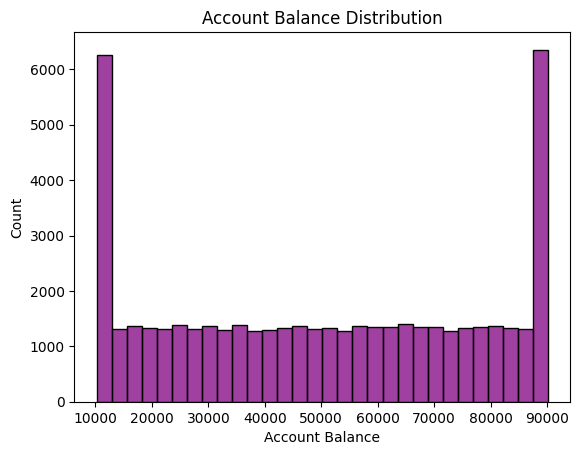

In [ ]:
#univariate histplot to kmow account balance
sns.histplot(ori_data.Account_Balance,color='purple')
plt.title('Account Balance Distribution')
plt.xlabel('Account Balance')
plt.ylabel('Count')
plt.savefig('account_balance.png')
plt.show()


In [ ]:
ori_data.Account_Balance.value_counts().to_frame()

,count
Account_Balance,
90125.151,5000
10267.041,5000
23686.660,2
55181.480,2
45621.460,2
...,...
34929.640,1
82408.730,1
87967.970,1


Observation:

Two specific account balances 90125.15 and 10267.04 have very high counts (5000 each).

This clearly shows that many values were capped and floored during outlier handling.

Other account balances occur much less frequently, showing a more natural distribution.

The spikes at min and max are results of replacing extreme values using the IQR method

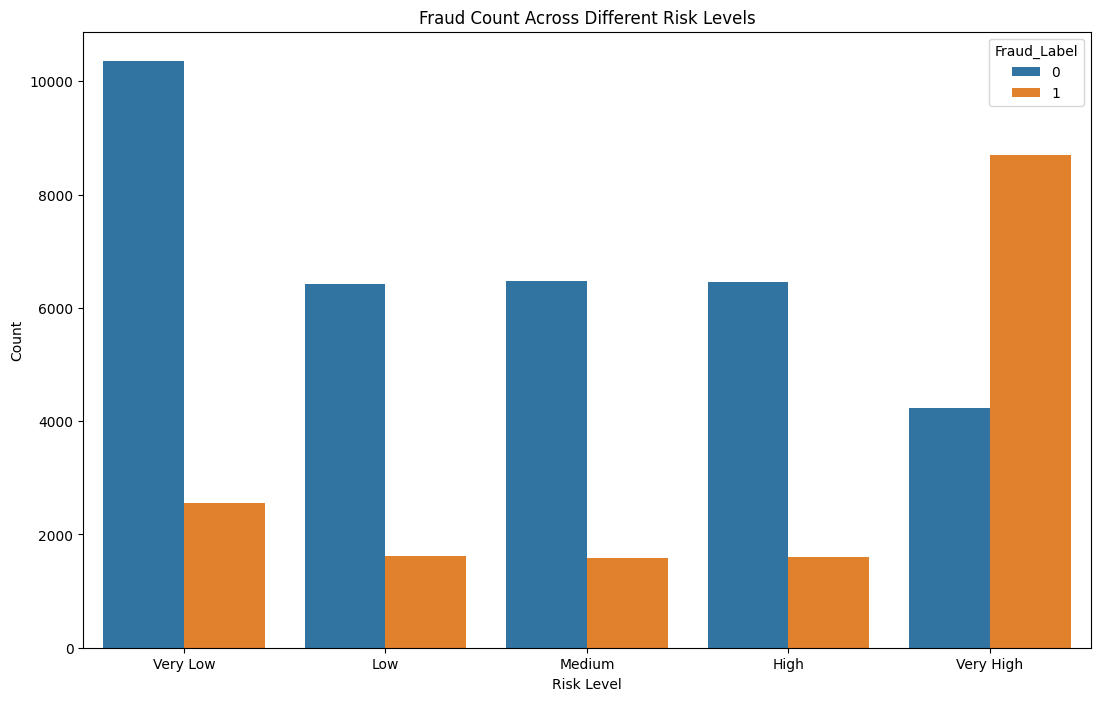

In [ ]:
# Create binned risk levels
ori_data['Risk_Level'] = pd.cut(ori_data['Risk_Score'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Plot fraud count by risk level
plt.figure(figsize=(13,8))
sns.countplot(data=ori_data, x='Risk_Level', hue='Fraud_Label')
plt.title('Fraud Count Across Different Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()


Observation:

Most frauds happened in the Very High Risk group.

Other risk levels had more non-fraud cases.

So, as risk score increases, chances of fraud also go up.

ENCODING

**One hot encoding:** converts the string data into numeric based on no of attribute in bit format.

Label Encoding: gives the label fron 0 to n in alphabetical order

Note: suppose values are female , female1 labels will be same that is 0,0


In [ ]:
#ONE Hot Encoding
categorical_cols = ['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 'Card_Type', 'Authentication_Method','Risk_Level']

data_encoded = pd.get_dummies(ori_data, columns=categorical_cols)
print(data_encoded)

       Transaction_Amount  Account_Balance  Daily_Transaction_Count  \
0                  39.790        90125.151                      7.0   
1                  10.470        75725.250                     13.0   
2                  28.960        10267.041                     13.0   
3                 227.031        76807.200                      8.0   
4                  31.280        90125.151                     13.0   
...                   ...              ...                      ...   
49995              45.050        76960.110                      2.0   
49996             126.150        28791.750                     13.0   
49997              72.020        29916.410                      2.0   
49998              64.890        67895.670                     13.0   
49999              13.000        10267.041                      5.0   

       Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d  Card_Age  \
0                        437.630                          3.0      65.0 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy original data to avoid modifying ori_data
data = ori_data.copy()

# List of categorical features
categorical_features = ['Transaction_Type', 'Device_Type', 'Location',
                        'Merchant_Category', 'Card_Type', 'Authentication_Method','Risk_Level']

# Apply Label Encoding to each column separately
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

print(data.head())

   Transaction_Amount  Transaction_Type  Account_Balance  Device_Type  \
0              39.790                 3        90125.151            0   
1              10.470                 1        75725.250            1   
2              28.960                 2        10267.041            2   
3             227.031                 0        76807.200            2   
4              31.280                 3        90125.151            1   

   Location  Merchant_Category  Daily_Transaction_Count  \
0         3                  4                      7.0   
1         2                  0                     13.0   
2         1                  3                     13.0   
3         2                  0                      8.0   
4         1                  1                     13.0   

   Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d  Card_Type  \
0                    437.630                          3.0          0   
1                    450.960                          4.0     

Text(0.5, 1.0, 'Correlation map')

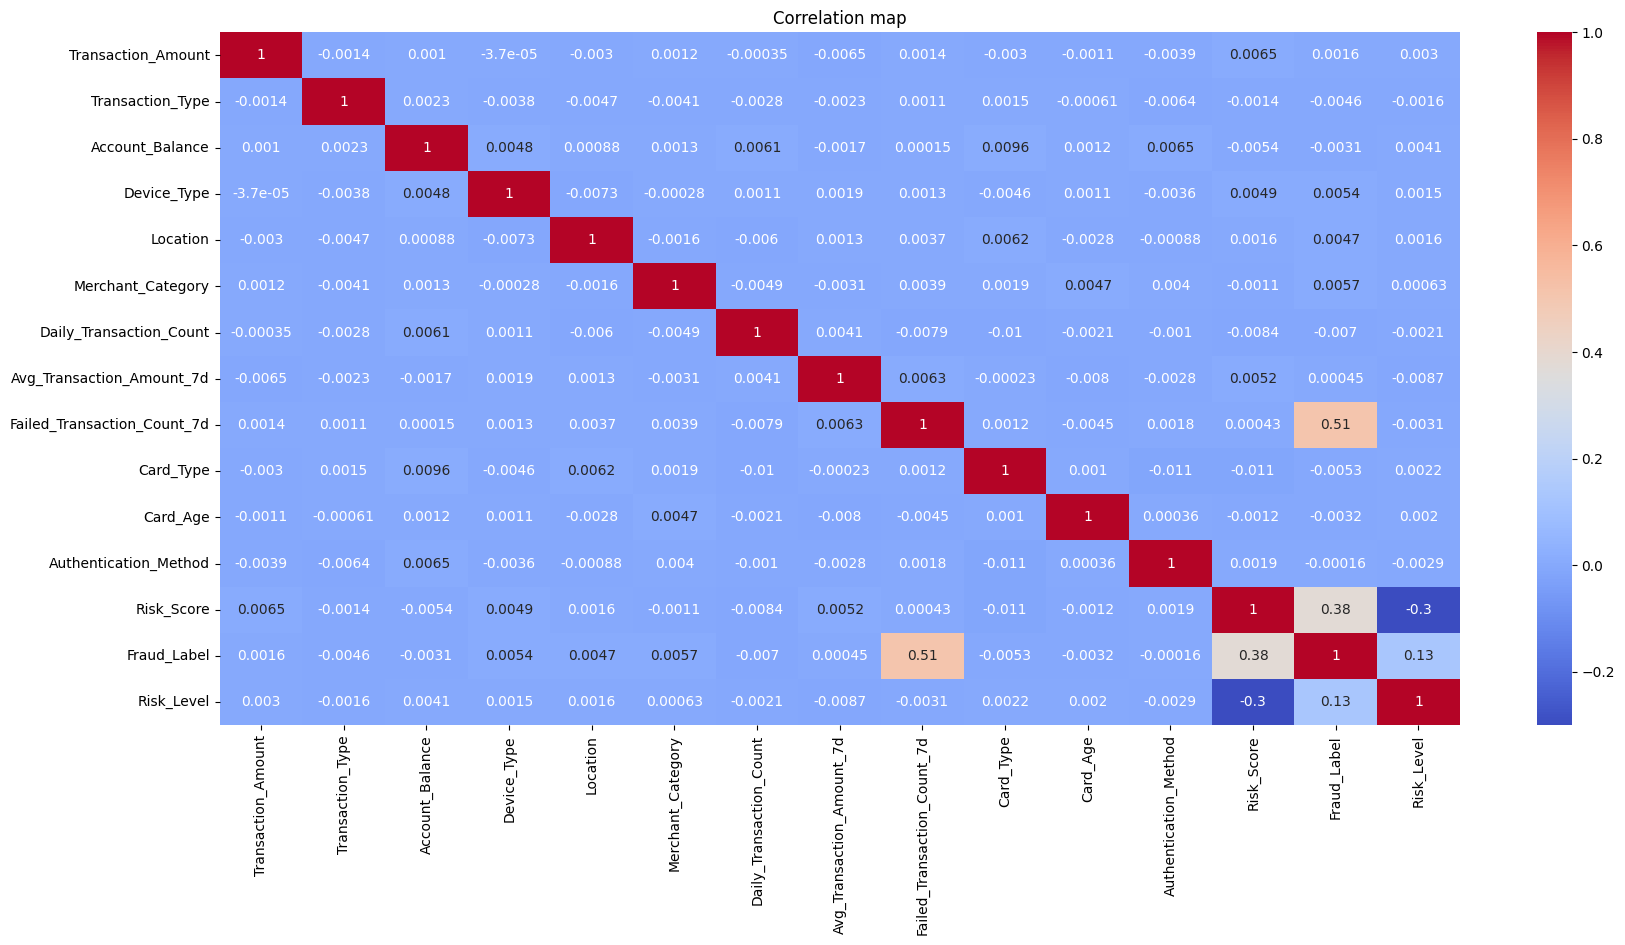

In [ ]:
#Finding the correlation
plt.figure(figsize=(20,9));
sns.heatmap(data.corr(),annot=True,cmap='coolwarm');
plt.title("Correlation map")

Observation:

From the plot we can observe that Failed_Transaction_Count_7d and Risk_Score  shows highest relation with dependent variable fraud_label.

so tis two feature will play crucious role in fraud detection

NOTE: The diagonal value is (1) because it show correlation with itself

also correlation always in range -1 to 1

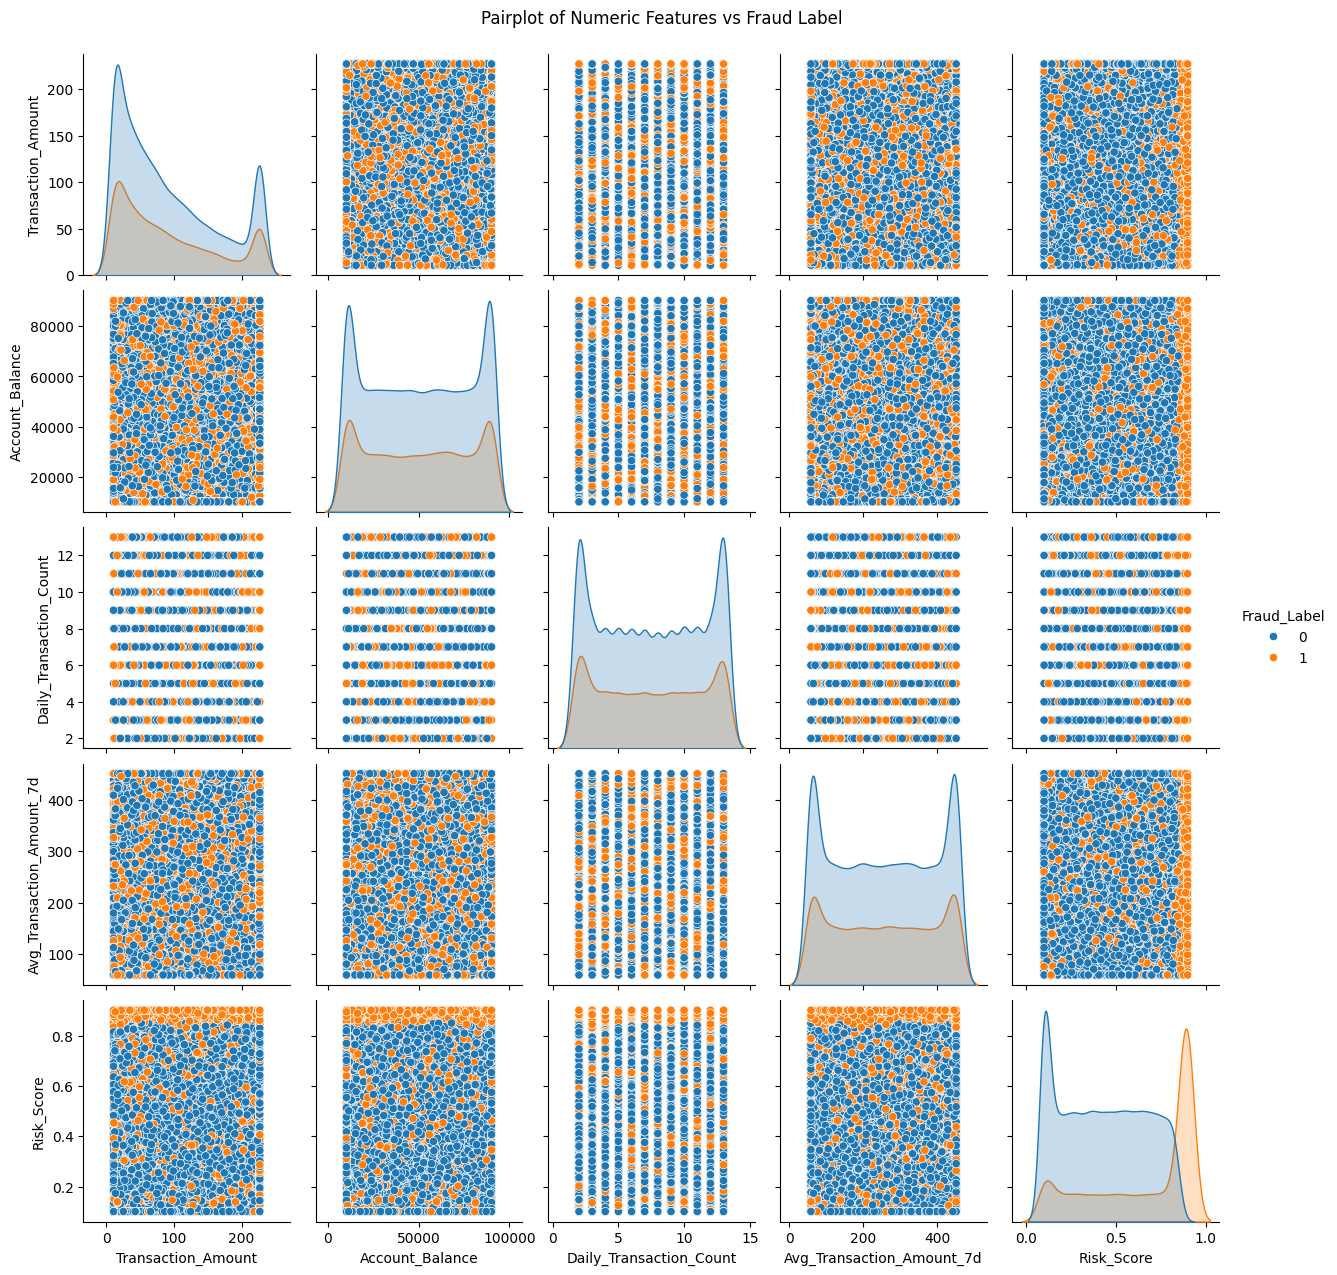

In [ ]:
# pairplot for numeric columns, to plot pairwise relationships between variables within a dataset
# use to check whether data is linearly separable or non linearly seperable
sns.pairplot(data[['Transaction_Amount', 'Account_Balance', 'Daily_Transaction_Count',
                   'Avg_Transaction_Amount_7d', 'Risk_Score', 'Fraud_Label']], hue='Fraud_Label')

plt.suptitle('Pairplot of Numeric Features vs Fraud Label', y=1.02)
plt.show()


Observation

from the pair plot we can observe that data is not linearly seperable


**Feature Scaling**

In [ ]:
ori_data.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Authentication_Method,Risk_Score,Fraud_Label,Risk_Level
0,39.790,POS,90125.151,Laptop,Sydney,Travel,7.0,437.630,3.0,Amex,65.0,Biometric,0.8494,0,Very High
1,10.470,Bank Transfer,75725.250,Mobile,New York,Clothing,13.0,450.960,4.0,Mastercard,186.0,Password,0.1024,1,Very Low
2,28.960,Online,10267.041,Tablet,Mumbai,Restaurants,13.0,59.169,4.0,Visa,216.0,Biometric,0.8400,1,Very High
3,227.031,ATM Withdrawal,76807.200,Tablet,New York,Clothing,8.0,182.480,4.0,Visa,76.0,OTP,0.7935,1,Very High
4,31.280,POS,90125.151,Mobile,Mumbai,Electronics,13.0,328.690,4.0,Mastercard,140.0,Password,0.3819,1,Low


In [ ]:
data=ori_data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
data[['Transaction_Amount', 'Account_Balance',
            'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
            'Failed_Transaction_Count_7d', 'Risk_Score', 'Card_Age']]=scale.fit_transform(data[['Transaction_Amount', 'Account_Balance',
            'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
            'Failed_Transaction_Count_7d', 'Risk_Score', 'Card_Age']])

In [ ]:
data.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Authentication_Method,Risk_Score,Fraud_Label,Risk_Level
0,0.135389,POS,1.000000,Laptop,Sydney,Travel,0.454545,0.965977,0.75,Amex,0.209424,Biometric,0.936090,0,Very High
1,0.000000,Bank Transfer,0.819681,Mobile,New York,Clothing,1.000000,1.000000,1.00,Mastercard,0.842932,Password,0.000000,1,Very Low
2,0.085380,Online,0.000000,Tablet,Mumbai,Restaurants,1.000000,0.000000,1.00,Visa,1.000000,Biometric,0.924311,1,Very High
3,1.000000,ATM Withdrawal,0.833230,Tablet,New York,Clothing,0.545455,0.314737,1.00,Visa,0.267016,OTP,0.866040,1,Very High
4,0.096093,POS,1.000000,Mobile,Mumbai,Electronics,1.000000,0.687920,1.00,Mastercard,0.602094,Password,0.350251,1,Low


**Data Preparation**

In [ ]:
#split dataset in features and target variable

feature_cols = ['Transaction_Amount', 'Account_Balance',
            'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
            'Failed_Transaction_Count_7d', 'Risk_Score', 'Card_Age']
X = data[feature_cols] # Features
y = data.Fraud_Label # Target variable

In [ ]:
# Find the values of Category column
data['Fraud_Label'].value_counts()

,count
Fraud_Label,
0,33933
1,16067


<Axes: xlabel='Fraud_Label', ylabel='count'>

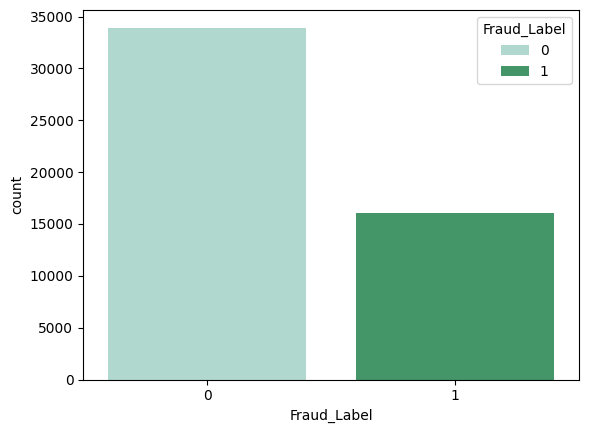

In [ ]:
# count plot of fraud column
# palette: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r,
# GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r,

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data, x='Fraud_Label', hue= 'Fraud_Label', palette = "BuGn")

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state = 42)

In [ ]:
X_train.shape

(35000, 7)

In [ ]:
X_test.shape

(15000, 7)

In [ ]:
print("X_train count:", len(X_train))
print("X_test count:", len(X_test))
print("y_train count:", len(y_train))
print("y_test count:", len(y_test))

X_train count: 35000
X_test count: 15000
y_train count: 35000
y_test count: 15000


In [ ]:
#These are for barplot in conclusion
method_names = []
method_scores = []

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score

**LOGISTIC REGRESSION CLASSIFICATION**

Works on linear relationships and uses the sigmoid function to predict probabilities.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracyLR = accuracy_score(y_test, y_pred)
precisionLR = precision_score(y_test, y_pred)
print("Accuracy LR:", accuracyLR)
print("Precision LR:", precisionLR)

print("Logistic Regression Classification Test Accuracy: {:.4f}".format(log_reg.score(X_test, y_test)))

Accuracy LR: 0.8008
Precision LR: 0.7167036625971143
Logistic Regression Classification Test Accuracy: 0.8008


In [ ]:
# Store results
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(X_test, y_test))


In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_mat)


Confusion Matrix:
 [[7427 1021]
 [1469 2583]]


In [ ]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      8448
           1       0.72      0.64      0.67      4052

    accuracy                           0.80     12500
   macro avg       0.78      0.76      0.77     12500
weighted avg       0.80      0.80      0.80     12500



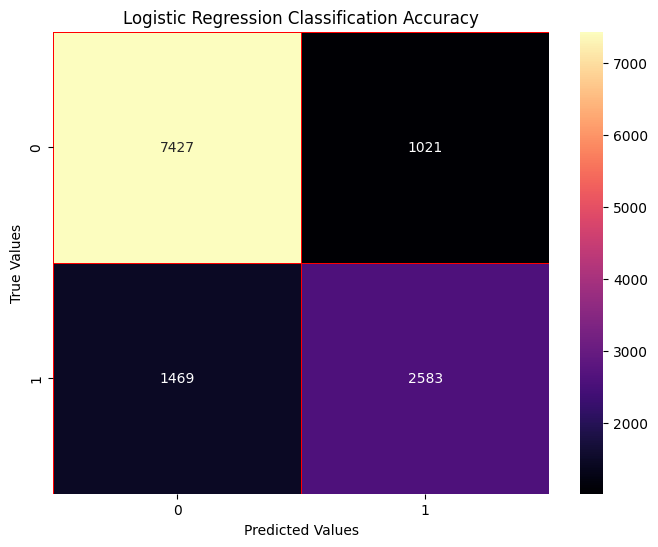

In [ ]:
# Visualize Confusion Matrix
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax, cmap='magma')
plt.title("Logistic Regression Classification Accuracy")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

**Observation:**

The model correctly predicted most non-fraud cases (7427).

It identified 2583 frauds correctly, but missed 1469 frauds.

Around 1021 legit transactions were wrongly flagged as fraud

**NAIVE BAYES CLASSIFICATION**

 it works using probability and assumes feature independence

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

#Evaluation
accuracyNB = accuracy_score(y_test, y_pred_nb)
precisionNB = precision_score(y_test, y_pred_nb)

print("Accuracy NB:", accuracyNB)
print("Precision NB:", precisionNB)
print("Naive Bayes Classification Score: {}".format(nb_model.score(X_test,y_test)))

Accuracy NB: 0.88976
Precision NB: 0.8421187308085978
Naive Bayes Classification Score: 0.88976


In [ ]:
method_names.append("Naive Bayes")
method_scores.append(nb_model.score(X_test,y_test))

In [ ]:
#Confusion matrix
conf_mat = confusion_matrix(y_test,y_pred_nb)

In [ ]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_nb))


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      8448
           1       0.84      0.81      0.83      4052

    accuracy                           0.89     12500
   macro avg       0.88      0.87      0.87     12500
weighted avg       0.89      0.89      0.89     12500



Naive Bayes Classification Score: 0.88976


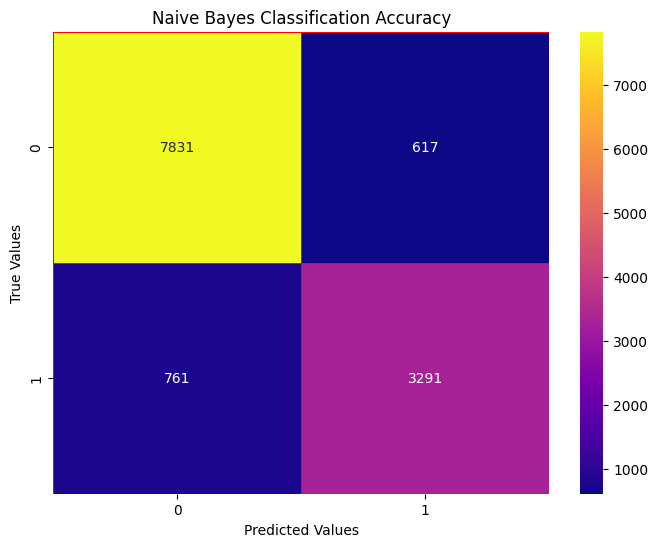

In [ ]:
print("Naive Bayes Classification Score: {}".format(nb_model.score(X_test,y_test)))

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax,cmap='plasma')
plt.title("Naive Bayes Classification Accuracy")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

**Observation**:

The model correctly predicted 7831 non-fraud and 3291 fraud cases.

It misclassified 761 frauds as non-frauds (false negatives),
617 non-frauds as frauds (false positives).

Naive Bayes gave higher accuracy (88.97%) compared to Logistic Regression (80.08%) because it assumes a Gaussian distribution

**KNN (K-Nearest Neighbour) CLASSIFICATION**

Works by measuring distance to classify based on the majority class of nearest neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Train KNN model
#distance formulas like l2,l1, error = euclidean,cosine,hamming,canberra,jaccard,sokalsneath,rogerstanimoto,chebyshev,infinity,yule,p
knn_model = KNeighborsClassifier(n_neighbors=5,metric='l1')
knn_model.fit(X_train,y_train)

# Predict on test set
y_pred = knn_model.predict(X_test)

#Evaluation
accuracyKNN = accuracy_score(y_test, y_pred)
precisionKNN = precision_score(y_test, y_pred)

print("Accuracy KNN:", accuracyKNN)
print("Precision KNN:", precisionKNN)
print("KNN Classification Score: {}".format(knn_model.score(X_test,y_test)))

Accuracy KNN: 0.96992
Precision KNN: 0.9450363196125908
KNN Classification Score: 0.96992


In [ ]:
method_names.append("KNN")
method_scores.append(knn_model.score(X_test,y_test))

In [ ]:
#Confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)

In [ ]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8448
           1       0.95      0.96      0.95      4052

    accuracy                           0.97     12500
   macro avg       0.96      0.97      0.97     12500
weighted avg       0.97      0.97      0.97     12500



KNN Classification Score: 0.96992


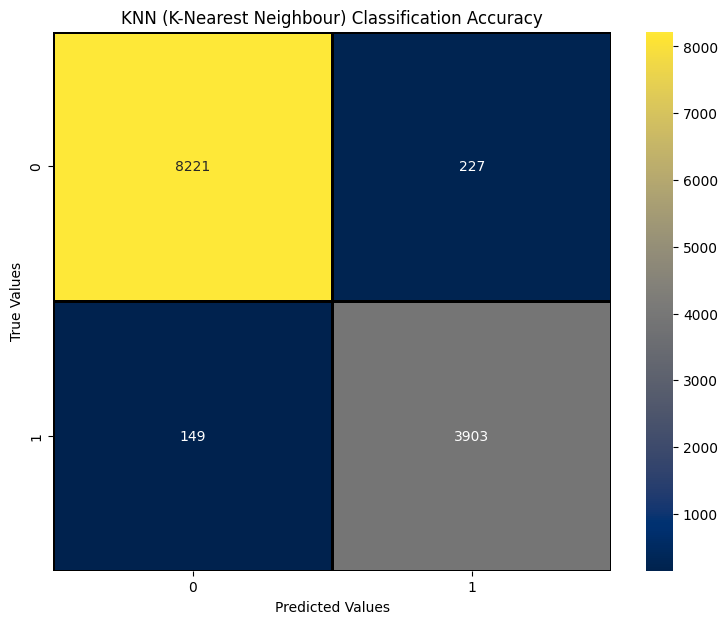

In [ ]:
print("KNN Classification Score: {}".format(knn_model.score(X_test,y_test)))

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(9,7))
sns.heatmap(conf_mat,annot=True,linewidths=0.8,linecolor="black",fmt=".0f",ax=ax,cmap='cividis')
plt.title("KNN (K-Nearest Neighbour) Classification Accuracy")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

**SUPPORT VECTOR MACHINE (SVM)**

Finds the best boundary (hyperplane) that maximizes margin between classes.

In [ ]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='rbf',random_state=46)
svm_model.fit(X_train, y_train)

#prediction
y_pred = svm_model.predict(X_test)

# Accuracy and precision
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
print("SVM Accuracy:", accuracy_svm)
print("SVM Precision:", precision_svm)
print("SVM Classification Score: {}".format(svm_model.score(X_test,y_test)))

SVM Accuracy: 0.99408
SVM Precision: 0.9884577603143418
SVM Classification Score: 0.99408


#NOTE
.score(X_test, y_test)
Used on models (e.g., model.score(...))

Automatically predicts and calculates accuracy

Quick and easy for accuracy only

accuracy_score(y_test, y_pred)
Used from sklearn.metrics

Needs predictions first

More flexible – useful when you're also calculating precision, recall,e

In [ ]:
method_names.append("SVM")
method_scores.append(accuracy_svm)

In [ ]:
#Confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)

In [ ]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8448
           1       0.99      0.99      0.99      4052

    accuracy                           0.99     12500
   macro avg       0.99      0.99      0.99     12500
weighted avg       0.99      0.99      0.99     12500



SVM Classification Score: 99.41


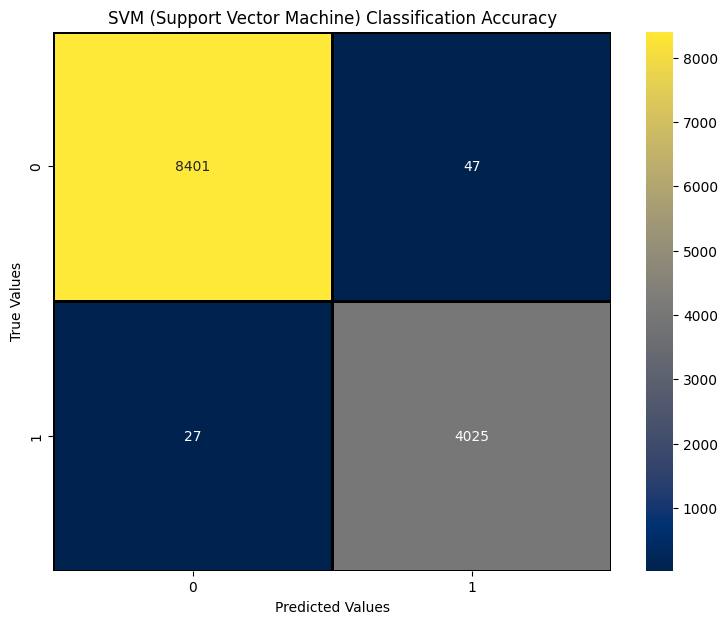

In [ ]:
print("SVM Classification Score: {}".format(round(svm_model.score(X_test,y_test)*100,2)))

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(9,7))
sns.heatmap(conf_mat,annot=True,linewidths=0.8,linecolor="black",fmt=".0f",ax=ax,cmap='cividis')
plt.title("SVM (Support Vector Machine) Classification Accuracy")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

**DECISION TREE CLASSIFICATION**

Works by making splits based on features using criteria like Gini or Entropy to create a tree-like structure.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

#prediction
y_pred = dt_model.predict(X_test)

# Accuracy and Precision
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_dt)

Decision Tree Accuracy: 1.0
Decision Tree Precision: 1.0


In [ ]:
method_names.append("Decision Tree")
method_scores.append(accuracy_dt)

In [ ]:
#Confusion matrix
conf_mat_dt = confusion_matrix(y_test, y_pred)

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8448
           1       1.00      1.00      1.00      4052

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



Decision Tree Classification Score: 100.0


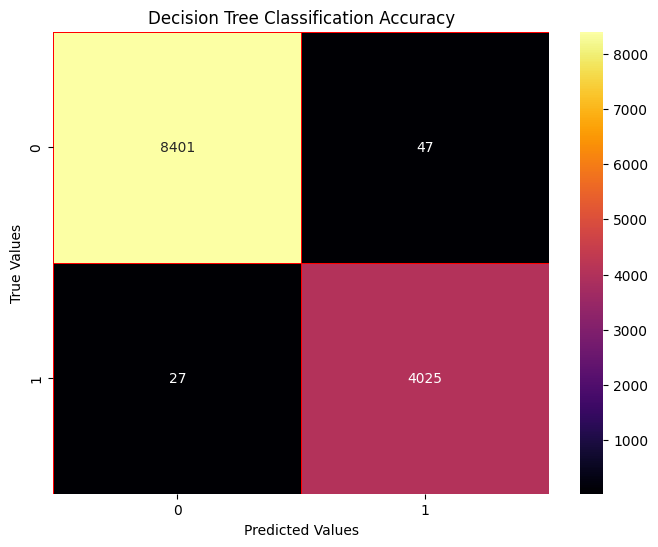

In [ ]:
print("Decision Tree Classification Score:",round(dt_model.score(X_test,y_test)*100,2))
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax,cmap='inferno')
plt.title("Decision Tree Classification Accuracy")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

**RANDOM FOREST CLASSIFICATION**  (Ensemble Learning Algorithm)

Bagging Algorithm

An ensemble of decision trees that combines predictions from multiple trees to reduce overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Train Random Forest algo
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

#Predict
y_pred_rf = rf_model.predict(X_test)

# Accuracy and Precision
accuracy_rf = round(accuracy_score(y_test, y_pred_rf)*100,2)
precision_rf = precision_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)

Random Forest Accuracy: 100.0
Random Forest Precision: 1.0


In [ ]:
method_names.append("Random Forest")
method_scores.append(accuracy_rf)

In [ ]:
#Confusion Matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

In [ ]:
#Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8448
           1       1.00      1.00      1.00      4052

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



Random Forest Classification Score:  100.0


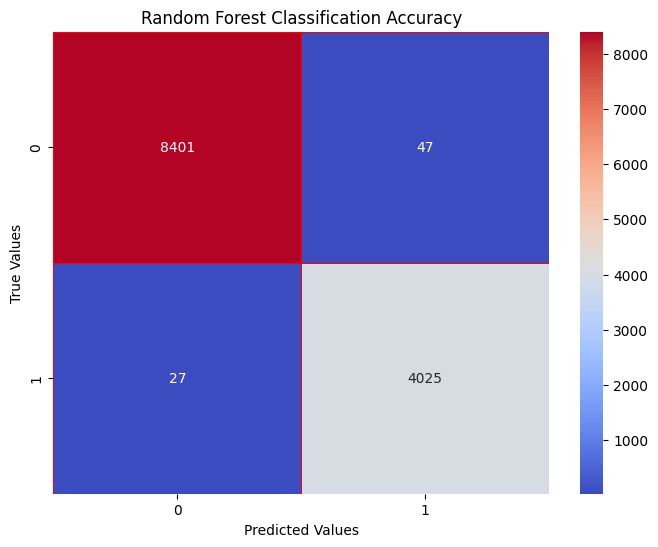

In [ ]:
print("Random Forest Classification Score: ",round(rf_model.score(X_test,y_test)*100,2))
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax,cmap='coolwarm')
plt.title("Random Forest Classification Accuracy")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

**BOOSTING Algo**

A boosting algorithm that builds trees sequentially, learning from previous mistakes to improve performance.

In [ ]:
#Import libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#Train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

#Predict
y_pred_xgb = xgb_model.predict(X_test)

#Evaluate performance
accuracyXGB = accuracy_score(y_test, y_pred_xgb)
precisionXGB = precision_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracyXGB)
print("XGBoost Precision:", precisionXGB)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:15:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.99904
XGBoost Precision: 0.9987654320987654

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8448
           1       1.00      1.00      1.00      4052

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



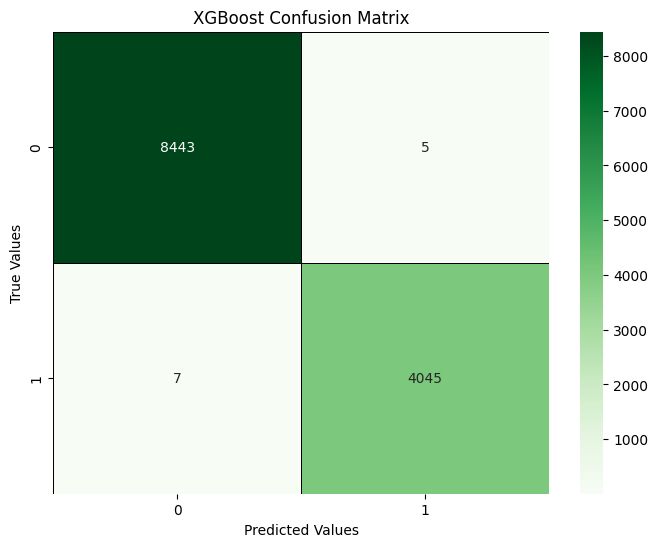

In [ ]:
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Greens', linewidths=0.5, linecolor='black')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


**Comparison Of All Algorithm**

Text(0, 0.5, 'Method Score')

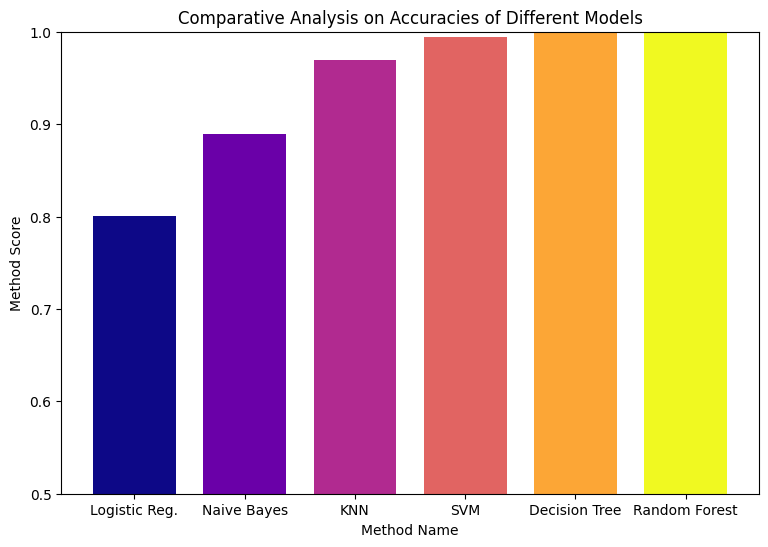

In [ ]:
plt.figure(figsize=(9,6))
plt.ylim([0.5,1])
# Generate colors from colormap
cmap = plt.cm.plasma   # You can use viridis, 'plasma', 'coolwarm','inferon', etc.
colors = cmap(np.linspace(0, 1, 6))

plt.bar(method_names, method_scores, width= 0.75, color=colors )
plt.title("Comparative Analysis on Accuracies of Different Models")
plt.xlabel('Method Name')
plt.ylabel('Method Score')

#converting accuracy in percentage and plotting

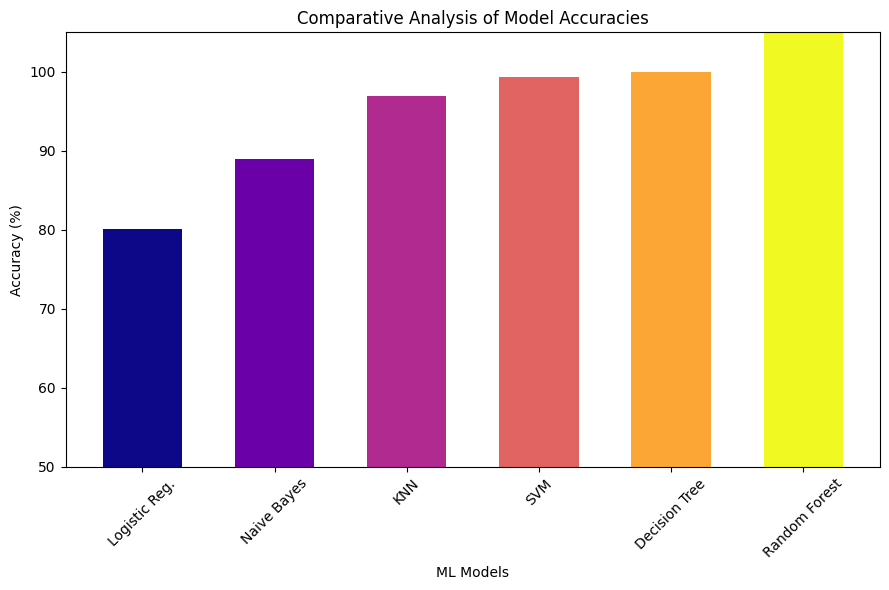

In [ ]:
plt.figure(figsize=(9, 6))
plt.ylim([50, 105])  #here it sets Y axis percentage range
# Generate colors from colormap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0, 1, len(method_names)))

# Convert scores to percentage
method_scores_percent = [score * 100 for score in method_scores]

# Plot
plt.bar(method_names, method_scores_percent, width=0.6, color=colors)

# Add labels and title
plt.title("Comparative Analysis of Model Accuracies")
plt.xlabel("ML Models")
plt.ylabel("Accuracy (%)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**OBSERVATION**

 Decision Tree and Random Forest gave the highest accuracy (100%) for fraud detection.

XGBoost also performed strongly with over 95% accuracy due to its boosting capability.

SVM and KNN achieved more than 95% accuracy, showing good results.
ogistic Regression and Naive Bayes had lower accuracy as they assume linear relationships and feature independence, which is not suit  for fraud detection data often complex and non-linear.

also the data which I have choosen is non linear this impact model performance

In [ ]:
# Save Model
import pickle
with open("FDmodel.pkl", "wb") as f:
    pickle.dump(svm_model, f)

In [ ]:
# Load the model
with open("FDmodel.pkl", "rb") as f:
    classifier = pickle.load(f)

print(type(classifier))

<class 'sklearn.svm._classes.SVC'>
